### 2000년부터 2021년까지 발생한 튀르키에 화재 데이터 셋 분석

  * 사용한 데이터 셋
   * https://www.kaggle.com/datasets/brsdincer/20002021-turkey-fire-points-single-csv-nasa

In [66]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
from folium import plugins
import os

In [ ]:
# CSV 파일 경로 지정
file_path = "/content/2000-2021_SINGLE_TURKEY_FIRE_M-C61_214067.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)
df.shape

<ipython-input-21-a38c2d82c252>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(211309, 15)

In [ ]:
# 데이터 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211309 entries, 0 to 211308
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    211309 non-null  float64
 1   longitude   211309 non-null  float64
 2   brightness  211309 non-null  float64
 3   scan        211309 non-null  float64
 4   track       211309 non-null  float64
 5   acq_date    211309 non-null  object 
 6   acq_time    211309 non-null  int64  
 7   satellite   211309 non-null  object 
 8   instrument  211309 non-null  object 
 9   confidence  211309 non-null  int64  
 10  version     211309 non-null  object 
 11  bright_t31  211309 non-null  float64
 12  frp         211309 non-null  float64
 13  daynight    211309 non-null  object 
 14  type        205918 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 24.2+ MB


In [ ]:
# 데이터의 요소들 확인

df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [ ]:
# 데이터의 결측치 확인

df.isnull().sum()

latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          5391
dtype: int64

  * latitude: 화재가 발생한 위도
  * longitude: 화재가 발생한 경도
  * brightness: 화재의 밝기 (기준: Kelvin)
  * scan: 화상 센서가 한 번 스캔한 거리 (기준: 1km)
  * track: 화상 센서가 한 번 스캔한 선의 수 (일반적으로 1km 내외)
  * acq_date: 화재가 감지된 날짜 (YYYY-MM-DD 형식)
  * acq_time: 화재가 감지된 시각 (hh:mm:ss 형식)
  * satellite: 데이터를 수집한 위성의 이름 (Terra or Aqua)
  * instrument: 위성의 센서 이름 (MODIS: Moderate Resolution Imaging Spectroradiometer)
  * confidence: 화재 감지의 확신도 (0~100 사이의 값)
  * version: 데이터셋 버전
  * bright_t31: 화재 위치의 대기 온도 (기준: Kelvin)
  * frp: 화재의 전력 (기준: Megawatts)
  * daynight: 화재가 낮인지 밤인지를 나타내는 값 (D: Day, N: Night)
  * type: 화재 타입 (Wildfire, Prescribed fire, or Undefined)

In [ ]:
# 데이터셋 확인

df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.85270,35.35940,306.00,2.10,1.40,2000-11-01,815,Terra,MODIS,60,6.03,294.40,13.20,D,0.0
1,40.54410,35.17860,307.80,1.10,1.00,2000-11-02,857,Terra,MODIS,66,6.03,296.00,5.80,D,0.0
2,40.14730,35.04440,305.30,1.10,1.00,2000-11-02,857,Terra,MODIS,46,6.03,293.50,4.30,D,0.0
3,40.54210,35.19090,310.00,1.10,1.00,2000-11-02,857,Terra,MODIS,69,6.03,296.10,7.30,D,0.0
4,41.25690,31.41720,307.90,1.10,1.00,2000-11-02,857,Terra,MODIS,0,6.03,290.40,8.00,D,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211304,37.30414,43.69511,330.30,1.02,1.01,2021-08-10,1011,Aqua,MODIS,38,6.1NRT,317.58,10.66,D,NaN
211305,37.05791,27.28960,327.24,1.96,1.37,2021-08-10,1149,Aqua,MODIS,74,6.1NRT,310.40,28.20,D,NaN
211306,38.64441,27.08695,341.95,2.00,1.38,2021-08-10,1149,Aqua,MODIS,88,6.1NRT,310.96,86.83,D,NaN
211307,37.05018,28.84606,342.40,2.48,1.52,2021-08-10,1149,Aqua,MODIS,90,6.1NRT,306.95,142.05,D,NaN


In [79]:
# 화재가 발생한 위치

from IPython.display import HTML

turkey = []

#turkey_map = folium.Map(location=[ df['latitude'].mean(), df['longitude'].mean() ], zoom_start=6)
loc = folium.Map( location = [36.123, 120.1212])
loc

plt.subplot(1, 2, 1)
sns.scatterplot(x = 'longitude', y = 'latitude', alpha = 0.1, data = df)

#turkey_map.save('turkey_map.html')

#plt.subplot(1,2,2)
#iframe = '<iframe src=' + 'turkey_map.html' + ' width=700 height=350></iframe>'
#display(HTML(turkey_map._repr_html_()))

### 해결 중

TypeError: ignored

  * 화재가 많이 발생한 지역일수록 진하게 표시


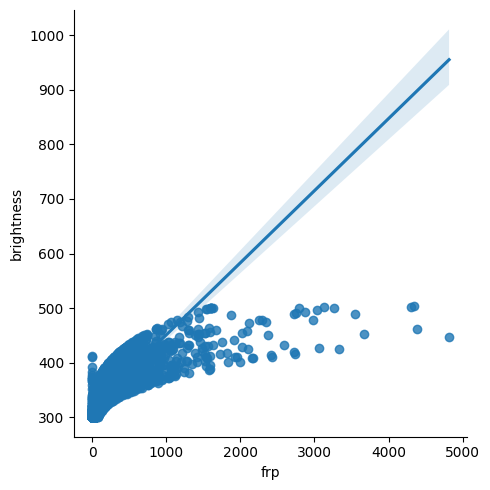

In [ ]:
# 화재의 전력과 화재의 밝기의 상관관계

sns.lmplot(x="frp", y="brightness", data=df)

  * 화재의 전력과 밝기는 양의 상관관계를 갖는다.
     * 로그함수적으로 비례하는듯 보인다

<Axes: xlabel='daynight', ylabel='count'>

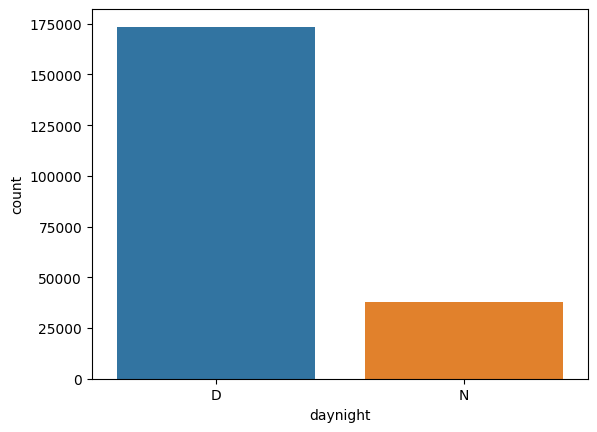

In [ ]:
# 화재가 발생하는 시간 - 낮, 밤 비교

sns.countplot(x='daynight', data = df)

  * 화재는 낮 시간에 대부분 일어난다
    * 왜?

<Axes: xlabel='type', ylabel='count'>

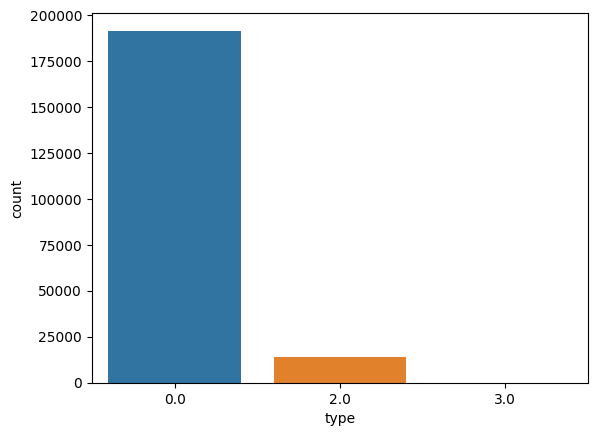

In [ ]:
# 화재 타입에 따라 발생하는 빈도 확인

sns.countplot(x='type', data = df)

  * 각각의 타입의 화재가 어느 정도 비중으로 나타나는지 확인
   * 0.0 : 정의되지않은 화재 타입
    ->(화재가 발생한 위치와 시간 등의 정보는 수집 되었지만 종류에 대한 정보가 충분하지 않음)
   * 2.0 : 자연발생산불
   * 3.0 : 인위적으로 식물을 태우는 예방적인 화재

  * 화재 타입에 결측치가 있다

In [ ]:
# 데이터 타입을 그룹화

df_type = df.groupby('type')

In [ ]:
# 결측지를 새로운 값 999.0으로 대체

df_type = df.fillna(999.0)

<Axes: xlabel='type', ylabel='count'>

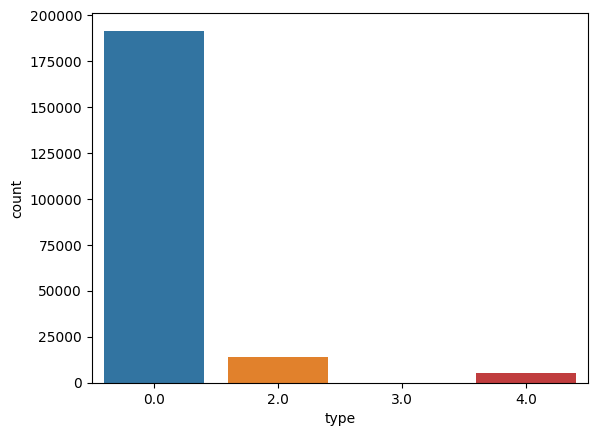

In [80]:
# 결측치를 포함하여 화재 타입에 따른 빈도 확인

sns.countplot(x='type', data = df_type)

  * 결측치를 포함하여 각각의 화재 타입에 따른 빈도를 확인할 수 있다

<Axes: xlabel='type', ylabel='frp'>

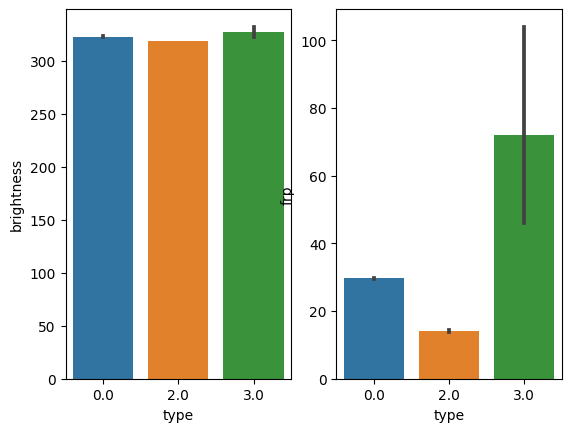

In [ ]:
# 화재의 밝기와 화재 타입, 화재의 전력과 화재 타입의 상관 관계

plt.subplot(1, 2, 1)
sns.barplot(x='type', y='brightness', data=df)

plt.subplot(1,2,2)
sns.barplot(x='type', y='frp', data=df)

  * 화재의 밝기는 화재 타입과는 큰 관련이 없고 화재의 전력은 화재 타입에 따라 다르다

In [ ]:
# 가장 높은 화재 밝기 구하기

max_brightness = df['brightness'].max()
print("가장 높은 화재 밝기 :", max_brightness, "Kelvin" )

# 가장 높은 화재 전력 구하기

max_frp = df['frp'].max()
print("가장 높은 화재 전력 :", max_frp, "Megawatts" )

가장 높은 화재 밝기 : 503.53 Kelvin
가장 높은 화재 전력 : 4816.68 Megawatts


In [ ]:
# 화재 밝기의 평균 구하기

mean_brightness = df['brightness'].mean()
print("화재 밝기 평균 :", mean_brightness, "Kelvin" )

# 화재 전력 평균 구하기

mean_frp = df['frp'].mean()
print("화재 전력 평균 :", mean_frp, "Megawatts" )

화재 밝기 평균 : 323.1034867894884 Kelvin
화재 전력 평균 : 30.34167508246217 Megawatts


In [ ]:
# 데이터를 수집한 위성의 종류

df['satellite'].unique()

array(['Terra', 'Aqua'], dtype=object)

  * 어느 위성이 더 일을 잘 할까

<Axes: xlabel='satellite', ylabel='count'>

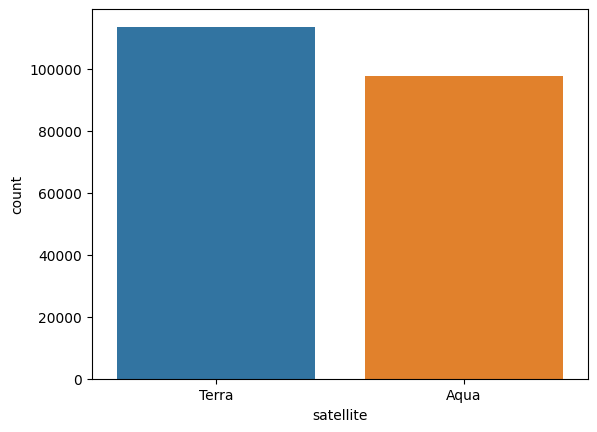

In [ ]:
# 각각의 위성이 감지한 화재의 수

sns.countplot(x='satellite', data = df)